# I. Lý thuyết

Đáp án lựa chọn sẽ được **tô đậm**

Đây là bảng confusion matrix của một mô hình phân loại nhị phân

![](https://imgur.com/1UZL68u.png)

Hãy cho biết:

1.- Đâu là công thức đúng của _Sensitivity (độ nhạy)_ ?

A. TP/(TP + FP)

**B. TP/(TP + FN)**

C. TP/(TN + FN)

D. TP/(TN + FP)

2.- Ý nghĩa của _Sensitivity (độ nhạy)_ trong mô hình chuẩn đoán bệnh?

**A. Sensitivity cho biết nếu một người mắc bệnh thật thì mô hình có thể nhận biết được mắc bệnh với xác suất là bao nhiêu phần trăm ?**

B. Sensitivity cho biết nếu mô hình chuẩn đoán một người mắc bệnh thì người đó có khả năng bị mắc bệnh thật là bao nhiêu phần trăm ?

C. Sensitivity cho biết nếu một người không bị mắc bệnh thì mô hình có thể nhận biết được người đó không mắc bệnh với xác suất bao nhiêu phần trăm ?

D. Sensitivity cho biết trong số những trường hợp không bị mắc bệnh thì mô hình có thể nhận biết được là bao nhiêu phần trăm ?

Có ba mô hình với cùng accuracy như sau.  (Model 3 không có cùng accuracy, model này có accuracy cao hơn)

![](https://imgur.com/zXUy6zd.png) => precision = 2/3, recall = 1/2 => f1 = 0.57

![](https://imgur.com/0GBEf8v.png) => precision = 3/4, recall = 3/4 => f1 = 0.75

![](https://imgur.com/t5I6f4y.png) => precision = 4/5, recall = 1 => f1 = 0.89

3.- Mô hình nào sẽ được lựa chọn?

A. Mô hình 1

B. Mô hình 2

**C. Mô hình 3**

D. Cả ba mô hình đều như nhau.

4.- f1-score của cả ba mô hình là lần lượt là:

A. m1: 0.571; m2: 0.675; m3: 0.75

B. m1: 0.75; m2: 0.675; m3: 0.889

**C. m1: 0.571; m2: 0.75; m3: 0.889**

D. không có đáp án nào đúng.

5.- Một mô hình phân loại ngẫu nhiên sẽ có đường ROC như thế nào ?

A. Lồi lên phía trên.

**B. Tiệm cận đường chéo nét đứt.**

C. Lõm xuống phía dưới.

D. Có dạng hình sin.

# II. Thực hành

Một mô hình phân loại nhị phân có giá trị dự báo `y_hat` và giá trị ground truth `y` lần lượt như sau:

In [ ]:
import numpy as np

y     = np.array([1, 0, 1, 1, 0,
                  1, 0, 0, 1, 0])
y_hat = np.array([0.8, 0.1, 0.85, 0.2, 0.4, 
                  0.7, 0.25, 0.05, 0.6, 0.1])

6. Nếu ngưỡng phân loại `threshold = 0.5`. Viết hàm tính 3 giá trị: `precision, recall, f1-score`


In [ ]:
#hàm để tính các giá trị precision, recall, f1

def precision(tp, fp):
  if tp + fp == 0:
    return 0
  else:
    return 1.0*tp / (tp + fp)

def recall(tp, fn):
  if tp + fn == 0:
    return 0
  else:
    return 1.0*tp / (tp + fn)

def f1(pre, rec):
  if (pre == 0) or (rec == 0):
    return 0
  return 2 / ((1.0/pre) + (1.0/rec))   

In [ ]:
def class_metrics(y, y_hat, threshold):
  label_yh = np.where(y_hat < threshold, 0, 1)
  True_Pos = False_Pos = True_Neg = False_Neg = 0
  for i in range(len(y)):
    if y[i] == 1: #actual label is positive
      if y[i] == label_yh[i]:
        True_Pos += 1
      else: 
        False_Neg += 1
    if y[i] == 0: #actual label is negative
      if y[i] == label_yh[i]:
        True_Neg += 1
      else: 
        False_Pos += 1
  return precision(True_Pos, False_Pos), recall(True_Pos,False_Neg), f1(precision(True_Pos,False_Pos),recall(True_Pos,False_Neg))

precision, recall, f1 = class_metrics(y, y_hat, 0.5)
print(f'Precision rate = {precision:.2f}')
print(f'Recall rate = {recall:.2f}')
print(f'F1-score = {f1:.2f}')

Precision rate = 1.00
Recall rate = 0.80
F1-score = 0.89


7. Nếu ngưỡng phân loại là `threshold = 0.5`. Viết hàm tính giá trị: `sensitivity, specificity`.

In [ ]:
def sens_and_spec(y, y_hat, threshold):
  label_yh = np.where(y_hat < threshold, 0, 1)
  True_Pos = False_Pos = True_Neg = False_Neg = 0
  for i in range(len(y)):
    if y[i] == 1: #actual label is positive
      if y[i] == label_yh[i]:
        True_Pos += 1
      else: 
        False_Neg += 1
    if y[i] == 0: #actual label is negative
      if y[i] == label_yh[i]:
        True_Neg += 1
      else: 
        False_Pos += 1
    if True_Pos + False_Neg > 0:
      sensitivity = 1.0 * True_Pos / (True_Pos + False_Neg)
    else: 
      sensitivity = 0
    if True_Neg + False_Pos == 0:
      specificity = 0
    else:
      specificity = 1.0 * True_Neg / (True_Neg + False_Pos)
  return sensitivity, specificity

sens, spec = sens_and_spec(y, y_hat, 0.5)
print(f'Sensitivity = {sens:.2f}')
print(f'Specificity = {spec:.2f}')
  

Sensitivity = 0.80
Specificity = 1.00


8. Vẽ biểu đồ đường cong ROC. Khi threshold thay đổi từ `[0, 1]` với steps là 0.05

In [ ]:
def confusion_matrix(Y, Y_hat):
  True_Pos = False_Pos = True_Neg = False_Neg = 0
  for i in range(len(Y)):
    if (Y[i] == 1):
      if (Y_hat[i] == 1):
        True_Pos += 1
      else:
        False_Neg += 1
    else:
      if (Y_hat[i] == 1):
        False_Pos += 1
      else:
        True_Neg += 1
  return (True_Pos, False_Pos, False_Neg, True_Neg)

In [ ]:
import matplotlib.pyplot as plt

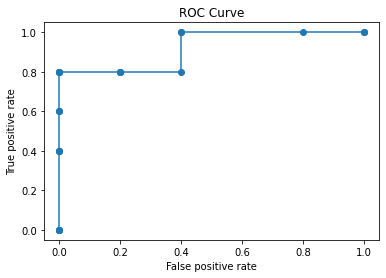

In [ ]:
def roc_pair(Y, Y_hat_rate, threshold):
  Y_hat = np.where(Y_hat_rate < threshold, 0, 1)
  tp, fp, fn, tn = confusion_matrix(Y, Y_hat)
  return (1 - specificity(tn, fp), sensitivity(tp, fn))

roc_list = [roc_pair(y, y_hat, threshold) for threshold in np.linspace(0,1,21)] 

plt.plot(*zip(*roc_list), marker = 'o')
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

9. Vẽ biểu đồ biểu diễn giá trị của `precision, recall` trên đồ thị khi threshold thay đổi từ `[0, 1]` với steps là 0.05.

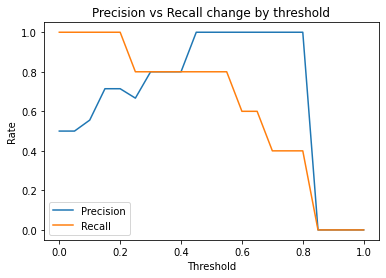

In [ ]:
def precision_with_threshold(Y, Y_hat_rate, threshold):
  Y_hat = np.where(Y_hat_rate < threshold, 0, 1)
  tp, fp, fn, tn = confusion_matrix(Y, Y_hat)
  return precision(tp, fp)

def recall_with_threshold(Y, Y_hat_rate, threshold):
  Y_hat = np.where(Y_hat_rate < threshold, 0, 1)
  tp, fp, fn, tn = confusion_matrix(Y, Y_hat)
  return recall(tp, fn)

threshold_list = np.linspace(0, 1, 21)
precision_list = [precision_with_threshold(y, y_hat, threshold) for threshold in threshold_list]
recall_list = [recall_with_threshold(y, y_hat, threshold) for threshold in threshold_list]

plt.plot(threshold_list, precision_list, label = 'Precision change')
plt.plot(threshold_list, recall_list, label = 'Recall change')
plt.title('Precision vs Recall change by threshold')
plt.legend(['Precision','Recall'])
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.show()

10. Viết hàm tính diện tích AUC của mô hình.

In [ ]:
def auc(roc_list):
  pre_x = roc_list[0][0]
  pre_y = roc_list[0][1]
  s = 0.0
  #if y changes and x does not, do not add anything 
  #if x changes, and y do not, add the size of the rectangle
  #if x changes and so do y, add the size of the rectangle (x_old - x_new) * y_old and the triangle 1/2 (x_old - x_new) * (y_old - y_new)
  for i in range(1, len(roc_list)):
    x = roc_list[i][0]
    y = roc_list[i][1]
    if pre_x != x:
      if (pre_y == y):
        s = s + abs((pre_x - x) * y)
      else:
        s = s + 1 / 2 * abs((pre_x - x) * (pre_y - y))
    pre_x = x
    pre_y = y
  return s 

print(auc(roc_list))

0.9199999999999999
